## Travel Package Purchase Prediction  
### Machine Learning Classification Project

This project predicts whether a customer will purchase a travel package based on their demographic and behavioral data.



**Target Variable:**
- `ProdTaken`
  - 1 → Customer will buy
  - 0 → Customer will not buy

#### Importing Required Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading and Understanding the Dataset

In [184]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [185]:
df.shape

(4888, 20)

In [186]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [187]:
df.duplicated().sum()

np.int64(0)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [189]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [190]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [191]:
categorical_cols=[i for i in df.columns if df[i].dtypes=='O']
categorical_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [192]:
for i in categorical_cols:
    print(df[i].unique())
    print('--'*20)


['Self Enquiry' 'Company Invited' nan]
----------------------------------------
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
----------------------------------------
['Female' 'Male' 'Fe Male']
----------------------------------------
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
----------------------------------------
['Single' 'Divorced' 'Married' 'Unmarried']
----------------------------------------
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
----------------------------------------


In [193]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [194]:
df['MaritalStatus']=df['MaritalStatus'].replace({'Unmarried':'Single'})

In [195]:
df['Gender']=df['Gender'].replace({'Fe Male':'Female'})

In [196]:
df['Age'].isnull().sum()

np.int64(226)

In [197]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [198]:
features_with_na=[i for i in df.columns if df[i].isnull().sum()>=1]
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

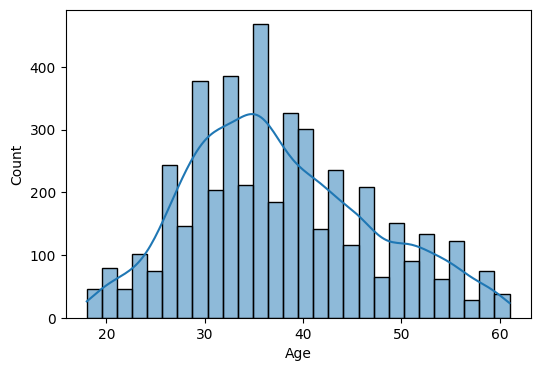

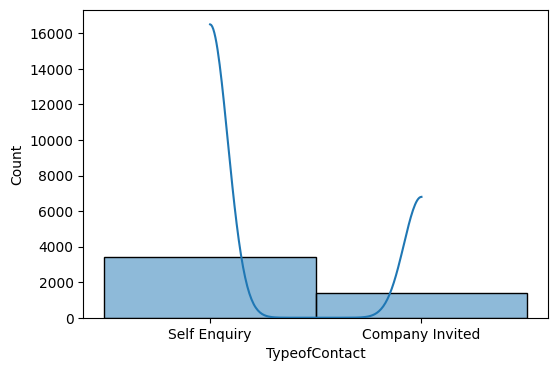

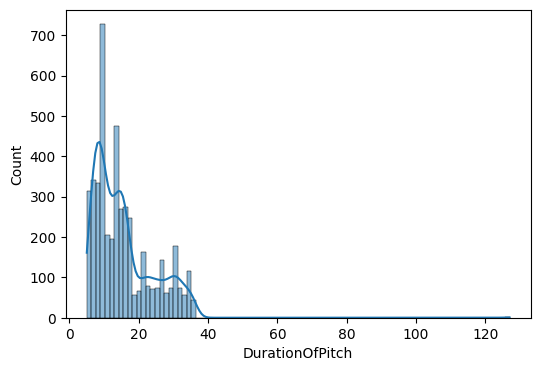

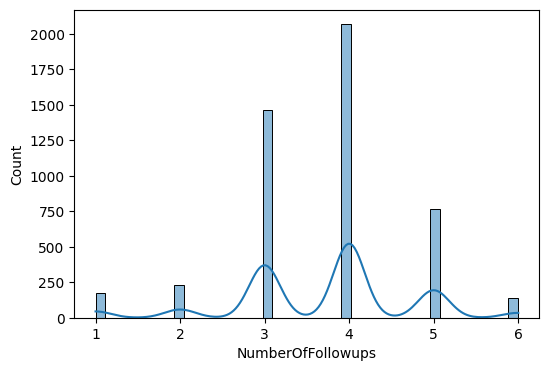

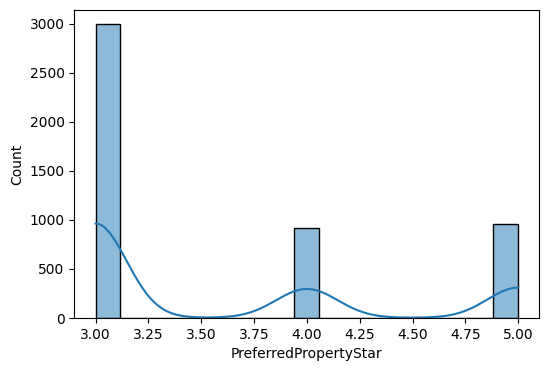

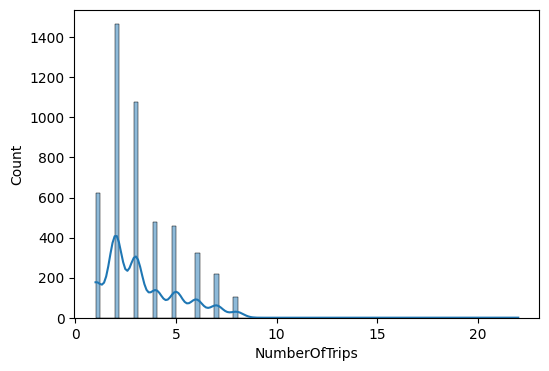

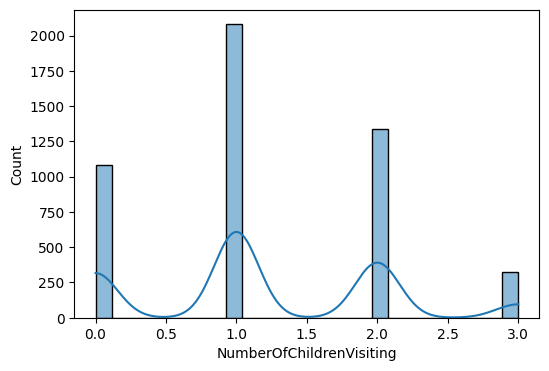

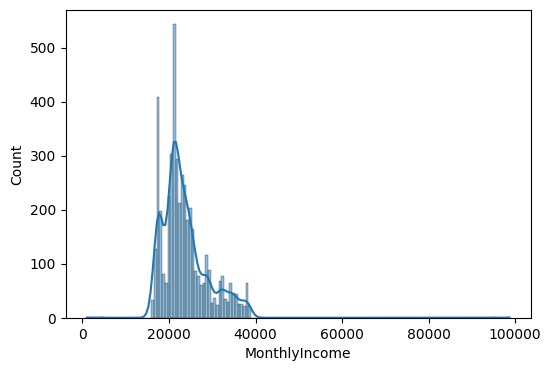

In [199]:
for i in features_with_na:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i],kde=True)
    plt.show()
    

In [200]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [201]:
#mean median mode median median median median median

df['Age']=df['Age'].fillna(df['Age'].mean())

df['TypeofContact']=df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median())

df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median())

df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())

df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median())

df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())



In [202]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [203]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Feature Engineering


In [204]:
# create neew columns total visiting
df['totalvisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']

In [205]:
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [206]:
# numeric features

numerical_cols=[i for i in df.columns if df[i].dtypes!='O']

categorical_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [207]:
categorical_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

#### Train Test Split

In [208]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalvisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0


In [209]:
X=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [210]:
X.head(2)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalvisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0


In [211]:
type(y)

pandas.core.series.Series

In [212]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [213]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalvisiting
3995,36.0,Self Enquiry,1,7.0,Small Business,Male,5.0,Basic,3.0,Single,3.0,0,4,1,Executive,21537.0,3.0
2610,42.0,Self Enquiry,1,21.0,Salaried,Male,4.0,Basic,3.0,Married,6.0,0,4,1,Executive,21129.0,5.0
3083,50.0,Self Enquiry,1,7.0,Large Business,Female,4.0,Basic,5.0,Divorced,4.0,0,4,1,Executive,22258.0,4.0
3973,38.0,Self Enquiry,1,7.0,Salaried,Male,5.0,Deluxe,3.0,Married,3.0,0,5,0,Manager,24671.0,4.0
4044,44.0,Company Invited,1,35.0,Small Business,Female,2.0,Basic,3.0,Single,6.0,0,3,0,Executive,23417.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,5.0,Basic,3.0,Single,2.0,0,1,1,Executive,20723.0,5.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,AVP,31595.0,4.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,4.0,Basic,3.0,Divorced,7.0,0,2,1,Executive,21651.0,5.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,5.0,Deluxe,3.0,Married,3.0,0,1,1,Manager,22218.0,5.0


In [214]:
cat_cols=X.select_dtypes(include='object').columns

In [215]:
num_cols=X.select_dtypes(exclude='object').columns

#### Data Preprocessing

- Categorical features are encoded using OneHotEncoder  
- Numerical features are scaled using StandardScaler  
- ColumnTransformer is used to apply transformations efficiently


In [216]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')


preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_cols),
        ("StandardScaler",numeric_transformer,num_cols)
    ]
)

In [217]:

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'totalvisiting'],
      dtype='object'))])

In [218]:
# applying transformation on training data
X_train=preprocessor.fit_transform(X_train)

In [219]:
X_train


array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [220]:
X_test=preprocessor.transform(X_test)
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

#### Model Training and Evaluation

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


models={
    "Logistic Regression":LogisticRegression(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier":RandomForestClassifier(random_state=42)
}

In [226]:
models.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest Classifier'])

In [227]:
models.values()

dict_values([LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42)])

In [228]:
models.items()

dict_items([('Logistic Regression', LogisticRegression(random_state=42)), ('Decision Tree', DecisionTreeClassifier(random_state=42)), ('Random Forest Classifier', RandomForestClassifier(random_state=42))])

In [238]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score

for name,model in models.items():
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)

    #testing set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)

    print(f"model: {name}\n")
    print(f"📊Training Set Performance")
    print(f"Accuracy   : {model_train_accuracy:.4f}")
    print(f"F1 Score   : {model_train_f1:.4f}")
    print(f"Precision  : {model_train_precision:.4f}")
    print(f"Recall     : {model_train_recall:.4f}")
    print(f"ROC AUC    : {model_train_roc_auc:.4f}")

    print(f"\n📊Testing Set Performance")
    print(f"Accuracy   : {model_test_accuracy:.4f}")
    print(f"F1 Score   : {model_test_f1:.4f}")
    print(f"Precision  : {model_test_precision:.4f}")
    print(f"Recall     : {model_test_recall:.4f}")
    print(f"ROC AUC    : {model_test_roc_auc:.4f}")

    print("--"*20,"\n")



model: Logistic Regression

📊Training Set Performance
Accuracy   : 0.8460
F1 Score   : 0.8204
Precision  : 0.7003
Recall     : 0.3045
ROC AUC    : 0.6373

📊Testing Set Performance
Accuracy   : 0.8364
F1 Score   : 0.8087
Precision  : 0.6914
Recall     : 0.2932
ROC AUC    : 0.6307
---------------------------------------- 

model: Decision Tree

📊Training Set Performance
Accuracy   : 1.0000
F1 Score   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
ROC AUC    : 1.0000

📊Testing Set Performance
Accuracy   : 0.9254
F1 Score   : 0.9248
Precision  : 0.8207
Recall     : 0.7906
ROC AUC    : 0.8743
---------------------------------------- 

model: Random Forest Classifier

📊Training Set Performance
Accuracy   : 1.0000
F1 Score   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
ROC AUC    : 1.0000

📊Testing Set Performance
Accuracy   : 0.9233
F1 Score   : 0.9165
Precision  : 0.9754
Recall     : 0.6230
ROC AUC    : 0.8096
---------------------------------------- 



#### Hyperparameter Tuning

In [240]:
param_grids = {

    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100,120],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },

    "Decision Tree": {
        'max_depth': [None, 5, 10, 20, 30,40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    "Random Forest Classifier": {
        'n_estimators': [50, 100, 200, 300,500,1000],
        'max_depth': [None, 10, 20, 30,5,8,15],
        'max_features':[5,7,'auto',8],
        'min_samples_split': [2, 5,8, 10,15,20]
    },

    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
}


In [246]:
import warnings
warnings.filterwarnings("ignore")

In [247]:
from sklearn.model_selection import RandomizedSearchCV

best_models={}

for name,model in models.items():

    print(f"\n Tuning {name}...")
    rs=RandomizedSearchCV(estimator=model,param_distributions=param_grids[name],n_iter=100,cv=3,verbose=2,n_jobs=-1)

    rs.fit(X_train,y_train)

    best_models[name] = rs.best_estimator_

    print("Best Params:", rs.best_params_)
    print("Best CV Score:", rs.best_score_)


 Tuning Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Best CV Score: 0.8442474657350427

 Tuning Decision Tree...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best CV Score: 0.8734032835975499

 Tuning Random Forest Classifier...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}
Best CV Score: 0.9168803076744401


In [249]:
best_models.items()

dict_items([('Logistic Regression', LogisticRegression(C=0.1, random_state=42)), ('Decision Tree', DecisionTreeClassifier(min_samples_split=5, random_state=42)), ('Random Forest Classifier', RandomForestClassifier(max_depth=20, max_features=8, n_estimators=500,
                       random_state=42))])

In [252]:
models={
    "Logistic Regression":LogisticRegression(C=0.1,random_state=42),
    "Decision Tree":DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=1,max_depth=None,random_state=42),
    "Random Forest Classifier":RandomForestClassifier(max_depth=20, max_features=8, n_estimators=500,random_state=42)
} 

for name,model in models.items():
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)

    #testing set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)

    print(f"model: {name}\n")
    print(f"📊Training Set Performance")
    print(f"Accuracy   : {model_train_accuracy:.4f}")
    print(f"F1 Score   : {model_train_f1:.4f}")
    print(f"Precision  : {model_train_precision:.4f}")
    print(f"Recall     : {model_train_recall:.4f}")
    print(f"ROC AUC    : {model_train_roc_auc:.4f}")

    print(f"\n📊Testing Set Performance")
    print(f"Accuracy   : {model_test_accuracy:.4f}")
    print(f"F1 Score   : {model_test_f1:.4f}")
    print(f"Precision  : {model_test_precision:.4f}")
    print(f"Recall     : {model_test_recall:.4f}")
    print(f"ROC AUC    : {model_test_roc_auc:.4f}")

    print("--"*20,"\n")



model: Logistic Regression

📊Training Set Performance
Accuracy   : 0.8445
F1 Score   : 0.8161
Precision  : 0.7079
Recall     : 0.2826
ROC AUC    : 0.6279

📊Testing Set Performance
Accuracy   : 0.8384
F1 Score   : 0.8095
Precision  : 0.7143
Recall     : 0.2880
ROC AUC    : 0.6300
---------------------------------------- 

model: Decision Tree

📊Training Set Performance
Accuracy   : 0.9867
F1 Score   : 0.9866
Precision  : 0.9815
Recall     : 0.9465
ROC AUC    : 0.9712

📊Testing Set Performance
Accuracy   : 0.9151
F1 Score   : 0.9126
Precision  : 0.8293
Recall     : 0.7120
ROC AUC    : 0.8382
---------------------------------------- 

model: Random Forest Classifier

📊Training Set Performance
Accuracy   : 1.0000
F1 Score   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
ROC AUC    : 1.0000

📊Testing Set Performance
Accuracy   : 0.9335
F1 Score   : 0.9293
Precision  : 0.9565
Recall     : 0.6911
ROC AUC    : 0.8417
---------------------------------------- 



Best Performing Model :**Random Forest Classifier**

In [254]:
model=RandomForestClassifier(max_depth=20, max_features=8, n_estimators=500,random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

#### Prediction on New Customer Data

In [263]:
import pandas as pd

new_data = pd.DataFrame({
    "Age": [41],
    "TypeofContact": ["Self Enquiry"],
    "CityTier": [3],
    "DurationOfPitch": [6.0],
    "Occupation": ["Salaried"],
    "Gender": ["Female"],
    "NumberOfFollowups": [3.0],
    "ProductPitched": ["Deluxe"],
    "PreferredPropertyStar": [3.0],
    "MaritalStatus": ["Single"],
    "NumberOfTrips": [1.0],
    "Passport": [1],
    "PitchSatisfactionScore": [2],
    "OwnCar": [1],
    "Designation": ["Manager"],
    "MonthlyIncome": [20993.0],
    "totalvisiting": [3.0]
})
new_data

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalvisiting
0,41,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0


In [264]:
new_data_processed=preprocessor.transform(new_data)
new_data_processed

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.38932795,  1.45504659, -1.14251917, -0.71872482, -0.7252712 ,
        -1.22062691,  1.58128038, -0.77772037,  0.78296635, -0.48565048,
        -0.77415132]])

In [269]:
prediction = model.predict(new_data_processed)
print("Pediction :",prediction[0])

Pediction : 1


In [272]:
probability = model.predict_proba(new_data_processed)
print("Prediction probability:",probability)

Prediction probability: [[0.14 0.86]]


1 → Customer will buy

0 → Customer will not buy